In [ ]:
%%latex
\Large{Calculations for Change in Loss wrt Sliding Offset}

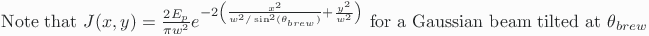

In [ ]:
%%latex
Note that $J(x,y) = \frac{2E_p}{\pi w^2}e^{-2\left( \frac{x^2}{w^2/ \sin^2(\theta_{brew})}+\frac{y^2}{w^2} \right)}$ for a Gaussian beam tilted at $\theta_{brew}$

In [ ]:
%%latex
The $E_p$ values calculated from the experimental data are as follows:

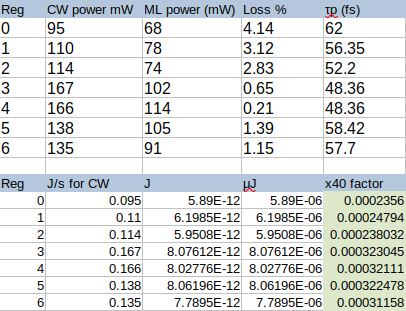

In [ ]:
%%latex
The geometries of the regions are as follows:

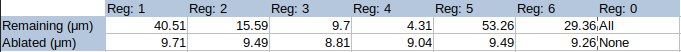

In [ ]:
%%latex
$w=34 \mu m$

In [ ]:
%%latex
Data synthesis is done as follows:

In [0]:
from beam import *  # beam.py is available at https://github.com/serinos/miscellaneous/blob/master/beam-graphene/beam.py

In [1]:
# Data synthesis

results = []  # results list will contain energy integral values(wrt offset 1um per step) of each Region Config
Einputs = [0.0002356,0.00024794,0.000238032,0.0003230448,0.0003211104,0.0003224784,0.00031158]  # Unit:uJ, Reg0thru6
Einputs_actual = []  # Results of integration for energy of beam matrices of Reg0thru6
width_config = [(5,0),(40.51,9.71),(15.59,9.49),(9.7,8.81),(4.31,9.04),(53.26,9.49),(29.36,9.26)]  # (Filled, ablated) for Reg0thru6, unit:um
w_val = 34  # unit:um
degree = brewster_calc(n_env=1, n_mat=1.45)  # Will tilt the beam accordingly

for i in range(7):
    ee = beam_inittilt(res=30, length=70, w=w_val, deg=degree, Ep=Einputs[i])  # Will look at a 70x70um region
    Einputs_actual.append(integrate_for_energy(ee))  # Useful for comparison with the intended Einput
    mm = mask_initialize(beam=ee, shape='lines', width=width_config[i][0], thickness=width_config[i][1], crop=False)
    stepsize = int(np.ceil(width_config[i][0] + width_config[i][1]))
    itrtr = mask_slide_iterator(beam=ee,mask=mm,stepsY=stepsize)  # Slider slides graphene layer about 1um at a time
    tmp = []
    for j in itrtr:
        k = integrate_for_energy(j[1])
        tmp.append(k)
        del(j)
    results.append(tmp)
    del(mm)
    del(itrtr)
    del(ee)

In [2]:
# Backing up the synthesized data

fp = open("ZeGSA.txt","w")
fp.write("ZeGSA Region 0 through 6 sliding results:\n")
counter = 0
for i in results:
    fp.write(f" Region {counter}:  ")
    fp.write(str(i))
    fp.write('\n')
    counter += 1
fp.close()

In [ ]:
%%latex
The plotting code for Figures 1a \& 1b is as follows:

In [9]:
# Plotting code for (Figure 1a)

dE_E = []  # dE_E will hold loss% values calculated from the results list
for i in range(7):
    dE_E.append([(200*(Einputs_actual[i] - j)/Einputs_actual[i]) for j in results[i]])  # 100*2*ΔE/E values are calculated, x2 is needed as the beam passes through the mask twice, the effect caused by the energy drop before the second pass is neglected
for i in range(7):
    plt.plot(dE_E[i], label=f"Region {i}")
plt.ylabel('Loss (%)')
plt.xlabel('Sliding Offset (um)')
plt.legend(loc = 'best')
plt.show()
# Note that the data for a region is cut after the initial mask conditions are met again, due to symmetry we can concatenate the results to themselves to match the lengths among the results of different regions

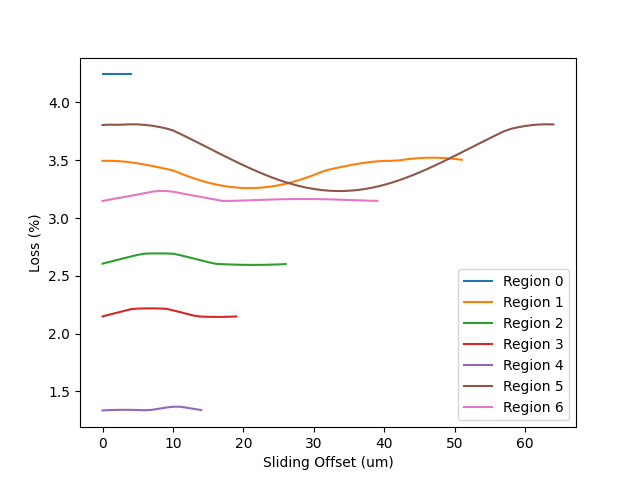

In [10]:
# Plotting code for (Figure 1b)

dE_E_diff = [200*(max(i)-min(i))/(max(i)+min(i)) for i in dE_E]
plt.plot([i for i in range(7)], dE_E_diff,'o')
plt.ylabel(r'% Change in Loss over Mean Loss')
plt.xlabel('Region No')
plt.show()

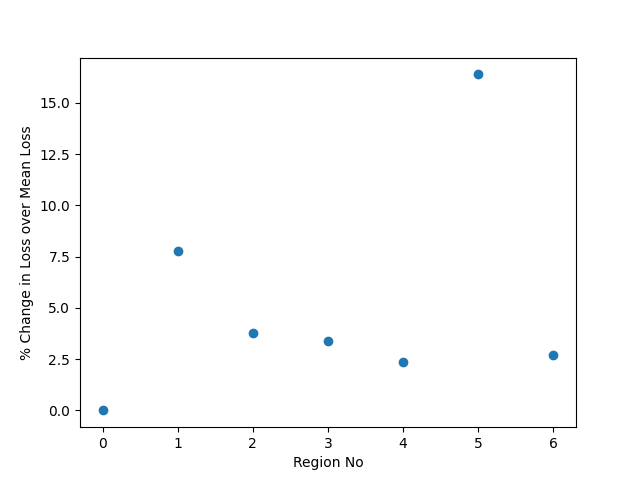